In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset
df = pd.read_csv('empl.csv')
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


# Exploratory Data Analysis (EDA)

In [3]:
# Check the dataset shape
df.shape

(22, 6)

In [4]:
# knowing the datatypes of the dataset 
df.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

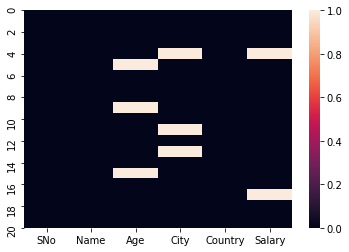

In [5]:
# checking for missing values by plotting a heat map
sns.heatmap(df.isnull())

In [6]:
# Confirming the missing values exist 
df.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [7]:
# Dropping irrelevant columns from the dataset 
df.drop(["SNo"],axis=1,inplace=True)
df.drop(["Name"],axis=1,inplace=True)

In [8]:
df.describe()

,Age,Salary
count,19.000000,19.000000
mean,32.421053,33739.947368
std,7.174924,23151.188084
min,22.000000,3900.000000
25%,27.000000,8888.000000
50%,31.000000,33451.000000
75%,36.000000,54666.000000
max,50.000000,67666.000000


In [9]:
# Now lets impute the missing values for columns Age, City and Salary
# using mode for categorical data and mean for continuous data 
col_to_impute=["Age","City", "Salary"]
for col in col_to_impute:
    if df[col].dtype!="object":
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [10]:
df.describe()

,Age,Salary
count,22.000000,22.000000
mean,32.421053,33739.947368
std,6.642689,21433.835262
min,22.000000,3900.000000
25%,27.250000,11666.000000
50%,31.500000,33739.947368
75%,34.000000,49633.000000
max,50.000000,67666.000000


In [11]:
# missing values imputed 
df.isnull().sum()

Age        0
City       0
Country    0
Salary     0
dtype: int64

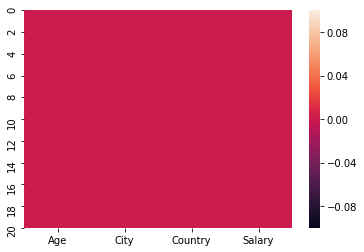

In [12]:
sns.heatmap(df.isnull())

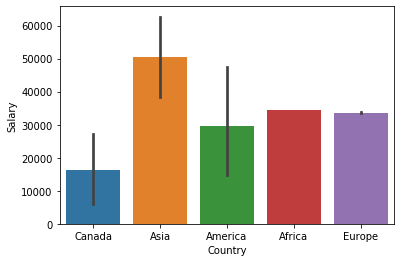

In [13]:
#Plotting a bar graph which shows avg salary in each country
sns.barplot(x="Country",y="Salary",data=df)

Asian's are drawing larger salaries compared to other countries

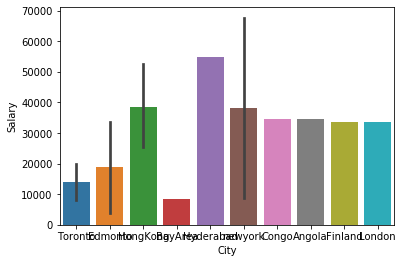

In [14]:
#Plotting a bar graph which shows avg salary in each City
sns.barplot(x="City", y="Salary",data=df)

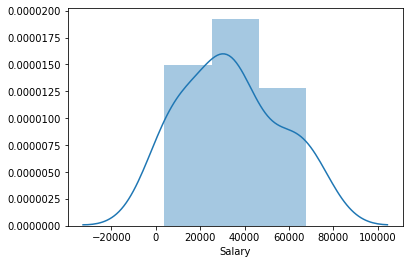

In [15]:
sns.distplot(df['Salary'])

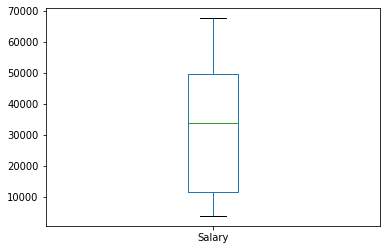

In [16]:
# sns.boxplot(df["Salary"])
df['Salary'].plot.box()

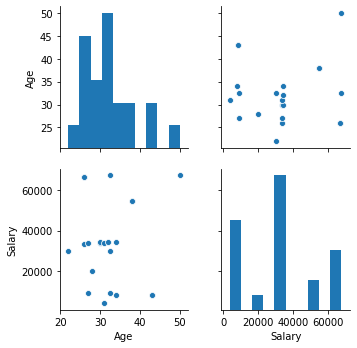

In [17]:
sns.pairplot(df)

there seems to be no linear relationship 

In [18]:
# Working on building the model 
df.head()

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.000000
1,31.0,Edmonto,Canada,3900.000000
2,34.0,Toronto,Canada,8000.000000
3,26.0,HongKong,Asia,66672.000000
4,30.0,HongKong,America,33739.947368


In [19]:
X = df.iloc[:, 0:-1].values  # Our Independent variable set 
y = df.iloc[:, -1].values # Our Dependent variable set 

Since the city and country variables contain text values, we will be using label encoder to encode the values
Also, to remove any relational order we will be using the one hot encoder to create dummy variables 

In [20]:
# Encoding the categorical data for city and country 
X=pd.get_dummies(df.iloc[:, :-1],drop_first=True)

In [21]:
X.head()

,Age,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,28.0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,31.0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,34.0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,26.0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,30.0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [22]:
X.shape

(22, 14)

In [23]:
# Function to find Max Score
def max_r2_score(regr,X,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [24]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lnr=LinearRegression()
final_r_state=max_r2_score(lnr,X,y)

max r2 score corresponding to  84  is  0.37825126457022873


In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=final_r_state)
lm=LinearRegression(normalize=True)
lm.fit(x_train,y_train)
lm.coef_
lm.intercept_
pred=lm.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))

MAE =  14040.541169202168
MSE =  257947606.30472094
RMSE =  16060.747376903757
R2_score =  0.37825126457022784


In [26]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
final_r_state_dt=max_r2_score(dtr,X,y)

max r2 score corresponding to  91  is  0.5714833839210508


In [27]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=final_r_state_dt)
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
#print(final_r_state_dt)

MAE =  6234.615789473684
MSE =  173094132.53753462
RMSE =  13156.524333483165
R2_score =  0.6321033829751348
91


In [28]:
# Finalizing the model on Linear Regression 

In [29]:
# Serialization of the model
import joblib
joblib.dump(dtr,'emp_salary.obj')

['emp_salary.obj']

In [30]:
model=joblib.load('emp_salary.obj')

In [31]:
model.predict(x_test)

array([66672.        ,  8300.        , 33739.94736842, 18819.97368421,
       38277.        ])